In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('players.csv')
df

,teamId,frame,x,y,ball_posession
0,Red,0,36,28,0
1,Red,0,45,52,0
2,Green,0,40,51,0
3,Green,0,46,57,0
4,Green,0,36,64,0
...,...,...,...,...,...
17997,Green,749,70,60,0
17998,Green,749,94,62,0
17999,Blue,749,87,70,0
18000,Blue,749,73,68,0


In [ ]:
points = []
start_x = None
start_y = None

for index, row in df.iterrows():
    if row['ball_posession'] == 1:  # Check if ball possession is 1
        if start_x is None:  # Starting point
            start_x = row['x']
            start_y = row['y']
        else:  # Ending point
            end_x = row['x']
            end_y = row['y']
            points.append((start_x, start_y))  # Append starting point
            points.append((end_x, end_y))      # Append ending point
            start_x = None
            start_y = None

# If the loop ends with an ongoing possession, consider it as an ending point
if start_x is not None:
    end_x = row['x']
    end_y = row['y']
    points.append((start_x, start_y))  # Append starting point
    points.append((end_x, end_y))      # Append ending point

print("Points:", points)


In [45]:
count=0
for index, row in df.iterrows():
    if row['ball_posession'] == 1:
        count=count+1

print("Number of completed passes:", count)

Number of completed passes: 102


In [75]:
df_combined = pd.DataFrame({
    'Starting Point',
    'Ending Point'
})

In [85]:
points = []
start_x = None
start_y = None

for index, row in df.iterrows():
    if row['ball_posession'] == 1:
        if start_x is None:
            start_x = row['x']
            start_y = row['y']
        else:
            end_x = row['x']
            end_y = row['y']
            points.append((start_x, start_y))
            points.append((end_x, end_y))
            start_x = None
            start_y = None
            
# Iterate through your data (replace with your actual loop)
for i in range(len(points) - 1):
    start_x, start_y = points[i]
    end_x, end_y = points[i + 1]
    df_combined = df_combined.append({'Starting Point': (start_x, start_y),
                                      'Ending Point': (end_x, end_y)}, ignore_index=True)

# Print the new DataFrame
print(df_combined)

AttributeError: 'DataFrame' object has no attribute 'append'

In [78]:
df_combined

,0,Starting Point,Ending Point
0,Ending Point,94,94
1,Starting Point,64,64


In [89]:
import pandas as pd
# Initialize lists to store starting and ending points
starting_points = []
ending_points = []
completed_passes = []

# Iterate through DataFrame rows
for i in range(len(df) - 1):
    # If current row and next row have ball possession 1
    if df.loc[i, "ball_posession"] == 1 and df.loc[i+1, "ball_posession"] == 1:
        # Extract starting and ending points
        start_point = (df.loc[i, "x"], df.loc[i, "y"])
        end_point = (df.loc[i+1, "x"], df.loc[i+1, "y"])
        
        # Check if teams are the same
        if df.loc[i, "teamId"] == df.loc[i+1, "teamId"]:
            completed_passes.append("pass completed")
        else:
            # Check if positions are the same
            if start_point == end_point:
                completed_passes.append("no pass")
            else:
                completed_passes.append("pass incomplete")
        
        # Append starting and ending points
        starting_points.append(start_point)
        ending_points.append(end_point)

# Create a new DataFrame with the results
pass_df = pd.DataFrame({
    "starting_point": starting_points,
    "ending_point": ending_points,
    "pass_status": completed_passes
})

print(pass_df)


Empty DataFrame
Columns: [starting_point, ending_point, pass_status]
Index: []


In [88]:
points = []
completed_pass=[]
start_x = None
start_y = None
t_id = None

for index, row in df.iterrows():
    if row['ball_posession'] == 1:  # Check if ball possession is 1
        t_id = row['teamId']
        if start_x is None:  # Starting point
            start_x = row['x']
            start_y = row['y']
        else:  # Ending point
            end_x = row['x']
            end_y = row['y']
            points.append((start_x, start_y))  # Append starting point
            points.append((end_x, end_y))      # Append ending point
            start_x = None
            start_y = None

# If the loop ends with an ongoing possession, consider it as an ending point
if start_x is not None:
    end_x = row['x']
    end_y = row['y']
    points.append((start_x, start_y))  # Append starting point
    points.append((end_x, end_y))      # Append ending point

# Initialize an empty list to store the transformed data
transformed_data = []

# Iterate through the coordinates
for i in range(len(points) - 1):
    # Extract starting and ending points
    start_point = points[i]
    end_point = points[i + 1]
    completed_pass = "pass" if start_point != end_point else "no pass"
    
    # Append to the transformed data
    transformed_data.append({
        "starting_point": start_point,
        "ending_point": end_point,
        "completed_pass": completed_pass
    })

# Convert the transformed data into a table format
import pandas as pd
columns = ["starting_point", "ending_point", "completed_pass"]
df_points = pd.DataFrame(transformed_data, columns=columns)
print(df_points)
# print(df_pass)
# print("Points:", points)
# print(len(points))
# print(df_combined)

    starting_point ending_point completed_pass
0         (40, 47)     (40, 47)        no pass
1         (40, 47)     (40, 48)           pass
2         (40, 48)     (34, 47)           pass
3         (34, 47)     (34, 47)        no pass
4         (34, 47)     (34, 47)        no pass
..             ...          ...            ...
96        (93, 64)     (94, 64)           pass
97        (94, 64)     (94, 64)        no pass
98        (94, 64)     (94, 64)        no pass
99        (94, 64)     (94, 64)        no pass
100       (94, 64)     (94, 64)        no pass

[101 rows x 3 columns]


In [47]:
df

,teamId,frame,x,y,ball_posession
0,Red,0,36,28,0
1,Red,0,45,52,0
2,Green,0,40,51,0
3,Green,0,46,57,0
4,Green,0,36,64,0
...,...,...,...,...,...
17997,Green,749,70,60,0
17998,Green,749,94,62,0
17999,Blue,749,87,70,0
18000,Blue,749,73,68,0


In [67]:
df_pass = pd.DataFrame()  # Create an empty DataFrame


In [96]:
points = []
start_x = None
start_y = None

for index, row in df.iterrows():
    if row['ball_posession'] == 1:  # Check if ball possession is 1
        if start_x is None:  # Starting point
            start_x = row['x']
            start_y = row['y']
        else:  # Ending point
            end_x = row['x']
            end_y = row['y']
            points.append((start_x, start_y, row['teamId']))  # Append starting point
            points.append((end_x, end_y, row['teamId']))      # Append ending point
            start_x = None
            start_y = None

# If the loop ends with an ongoing possession, consider it as an ending point
if start_x is not None:
    end_x = row['x']
    end_y = row['y']
    points.append((start_x, start_y, row['teamId']))  # Append starting point
    points.append((end_x, end_y, row['teamId']))      # Append ending point

print("Points:", points)
len(points)

Points: [(40, 47, 'Blue'), (40, 47, 'Blue'), (40, 48, 'Blue'), (34, 47, 'Blue'), (34, 47, 'Blue'), (34, 47, 'Blue'), (34, 47, 'Blue'), (40, 49, 'Blue'), (40, 49, 'Green'), (31, 54, 'Green'), (23, 59, 'Green'), (52, 49, 'Green'), (38, 61, 'Blue'), (41, 51, 'Blue'), (41, 51, 'Red'), (38, 37, 'Red'), (48, 53, 'Blue'), (40, 52, 'Blue'), (40, 53, 'Blue'), (40, 53, 'Blue'), (41, 53, 'Blue'), (41, 53, 'Blue'), (40, 53, 'Blue'), (40, 53, 'Blue'), (41, 53, 'Blue'), (41, 53, 'Blue'), (40, 52, 'Blue'), (41, 52, 'Blue'), (41, 52, 'Blue'), (41, 52, 'Blue'), (42, 53, 'Green'), (57, 39, 'Green'), (57, 39, 'Green'), (57, 39, 'Green'), (57, 39, 'Green'), (57, 39, 'Green'), (60, 47, 'Green'), (84, 53, 'Green'), (84, 60, 'Green'), (85, 60, 'Green'), (85, 60, 'Green'), (85, 60, 'Green'), (85, 60, 'Blue'), (80, 62, 'Blue'), (80, 62, 'Blue'), (80, 63, 'Blue'), (80, 63, 'Blue'), (76, 64, 'Blue'), (81, 63, 'Blue'), (77, 65, 'Blue'), (77, 65, 'Blue'), (81, 64, 'Blue'), (81, 65, 'Blue'), (81, 65, 'Blue'), (82, 

102

In [97]:
import pandas as pd
# Initialize lists to store data for DataFrame
starting_points = []
ending_points = []
pass_completions = []

# Iterate through the points list
for i in range(len(points) - 1):
    current_point = points[i]
    next_point = points[i + 1]

    # Extract coordinates and teamID
    current_coords = current_point[:2]
    next_coords = next_point[:2]
    team_id_current = current_point[2]
    team_id_next = next_point[2]

    # Determine pass completion
    if team_id_current == team_id_next:
        if current_coords == next_coords:
            pass_completions.append("no pass attempted")
        else:
            pass_completions.append("pass completed")
    else:
        pass_completions.append("pass incomplete")

    # Add starting and ending points to lists
    starting_points.append(current_coords)
    ending_points.append(next_coords)

# Create DataFrame
df = pd.DataFrame({
    "Starting_Point": starting_points,
    "Ending_Point": ending_points,
    "PassCompletion": pass_completions
})

print(df)


    Starting_Point Ending_Point     PassCompletion
0         (40, 47)     (40, 47)  no pass attempted
1         (40, 47)     (40, 48)     pass completed
2         (40, 48)     (34, 47)     pass completed
3         (34, 47)     (34, 47)  no pass attempted
4         (34, 47)     (34, 47)  no pass attempted
..             ...          ...                ...
96        (93, 64)     (94, 64)     pass completed
97        (94, 64)     (94, 64)  no pass attempted
98        (94, 64)     (94, 64)  no pass attempted
99        (94, 64)     (94, 64)  no pass attempted
100       (94, 64)     (94, 64)  no pass attempted

[101 rows x 3 columns]


40 47 40 47
40 47 40 48
40 48 34 47
34 47 34 47
34 47 34 47


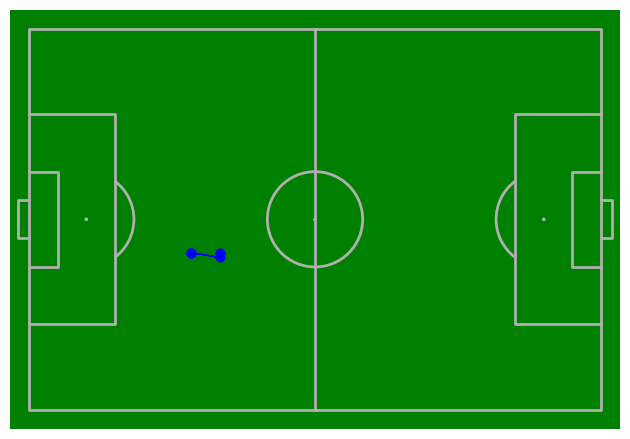

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer import Pitch
# Assuming you have already created a plot named 'ax'
pitch = Pitch(pitch_color= 'green', goal_type='box', goal_alpha=1)
fig, ax = pitch.draw()
# Iterate through the DataFrame to plot arrows between consecutive points
for i in range(len(points) - 1):
    x_start, y_start = points[i]     # Starting point
    x_end, y_end = points[i + 1]     # Ending point
    ax.arrow(x_start, y_start, x_end - x_start, y_end - y_start, color='blue', alpha=1)
    #also add the scatter
    ax.scatter(x_start, y_start, color='blue', zorder=3)
    ax.scatter(x_end, y_end, color='blue', zorder=3)


plt.show()  # Show the plot


In [ ]:
points = []
completed_pass=[]
start_x = None
start_y = None
t_id = None

for index, row in df.iterrows():
    if row['ball_posession'] == 1:  # Check if ball possession is 1
        t_id = row['teamId']
        if start_x is None:  # Starting point
            start_x = row['x']
            start_y = row['y']
        else:  # Ending point
            end_x = row['x']
            end_y = row['y']
            if row['teamId'] != t_id:
                #if start_x and start_y and end_x and end_y is same the do not append, no pass event:
                if start_x != end_x and start_y != end_y:
                    print("Incomplete Pass")
                    points.append((start_x, start_y))  # Append starting point
                    points.append((end_x, end_y))      # Append ending point
                    completed_pass.append("Incomplete Pass")
                    df_pass["Starting Point"]=(start_x, start_y)
                    df_pass["Ending Point"]=(end_x, end_y)
                else:
                    print("No Pass Event")  
                    completed_pass.append("No Pass Event")
                    points.append((start_x, start_y))  # Append starting point
                    points.append((end_x, end_y))      # Append ending point
                    df_pass["Starting Point"]=(start_x, start_y)
                    df_pass["Ending Point"]=(end_x, end_y)
            else:
                df_pass["Starting Point"] = [(start_x, start_y)]  # Assign values to the "Starting Point" column
                df_pass["Ending Point"] = [(end_x, end_y)]  # Assign values to the "Ending Point" column
                start_y = None

# If the loop ends with an ongoing possession, consider it as an ending point
if start_x is not None:
    end_x = row['x']
    end_y = row['y']
    if row['teamId'] != t_id:
        if start_x != end_x and start_y != end_y:
            print("Incomplete Pass")
            completed_pass.append("Incomplete Pass")
            points.append((start_x, start_y))  # Append starting point
            points.append((end_x, end_y))      # Append ending point
        else: 
            print("No Pass Event")
            completed_pass.append("No Pass Event")
            points.append((start_x, start_y))  # Append starting point
            points.append((end_x, end_y))      # Append ending point
    else:
        print("Completed Pass")
        if start_x != end_x and start_y != end_y:
            completed_pass.append("Completed Pass")
            points.append((start_x, start_y))  # Append starting point
            points.append((end_x, end_y))      # Append ending point
        else:
            completed_pass.append("No Pass Event")
            points.append((start_x, start_y))  # Append starting point
            df_pass["Starting Point"]=(start_x, start_y)
            points.append((end_x, end_y))      # Append ending point
            df_pass["Ending Point"]=(end_x, end_y)
            
print(len(completed_pass))
print(len(points))
# start_point = (start_x, start_y)
# start_point


print(df_pass)